# INFINITY TEAM

# Import Package

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
from jcopml.plot import plot_missing_value
import matplotlib.patches as mpatches
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve, plot_pr_curve

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.5
pandas version :  1.4.2
seaborn version :  0.11.0


#  Import Dataset

In [ ]:
df = pd.read_csv("train_20D8GL3.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


__Deskripsi:__
- __ID__ : Unique ID of each client
- __LIMIT_BAL__ : Amount of given credit (NT dollars): It includes both the individual consumer credit and his/her family
- __SEX__: 1(male) and 2 (female)
- __EDUCATION__ : 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
- __MARRIAGE__ :1=married, 2=single, 3=divorced
- __AGE__ : 
- __PAY_0__ : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months)
     -2 = bayr penuh dan tidak ada transaksi dibulan tersebut
	 -1 = bayar penuh tepat waktu dan masih ada transaksi aktif
	  0 = bayar tapi tidak lunas / sesuai minimal tagihan
	  1 = bayar tapi telat sebulan
	  2 = bayar tapi telat 2 bulan
      .....
      8 = bayar tapi telat 8 bulan
- __PAY_2__ : Repayment status in August, 2005 (scale same as above)
- __PAY_3__ : Repayment status in July, 2005 (scale same as above)
- __PAY_4__ : Repayment status in June, 2005 (scale same as above)
- __PAY_5__ : Repayment status in May, 2005 (scale same as above)
- __PAY_6__ : Repayment status in April, 2005 (scale same as above)
- __BILL_AMT1__ : Amount of bill statement in September, 2005 (NT dollar)
- __BILL_AMT2__ : Amount of bill statement in August, 2005 (NT dollar)
- __BILL_AMT3__ : Amount of bill statement in July, 2005 (NT dollar)
- __BILL_AMT4__ : Amount of bill statement in June, 2005 (NT dollar)
- __BILL_AMT5__ : Amount of bill statement in May, 2005 (NT dollar)
- __BILL_AMT6__ : Amount of bill statement in April, 2005 (NT dollar)
- __PAY_AMT1__ : Amount of previous payment in September, 2005 (NT dollar)
- __PAY_AMT2__ : Amount of previous payment in August, 2005 (NT dollar)
- __PAY_AMT3__ : Amount of previous payment in July, 2005 (NT dollar)
- __PAY_AMT4__ : Amount of previous payment in June, 2005 (NT dollar)
- __PAY_AMT5__ : Amount of previous payment in May, 2005 (NT dollar)
- __PAY_AMT6__ : Amount of previous payment in April, 2005 (NT dollar)
- __default_payment_next_month__ : Target Variable: Default payment (1=yes, 0=no)




In [ ]:
df0 = df[(df['default_payment_next_month'] == 1) ]
df0.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.0
mean,14678.651884,128699.177610,1.573089,1.885899,1.535199,35.576749,0.675565,0.465662,0.365770,0.265877,0.186222,0.119699,47574.474273,46432.251668,44254.426911,40960.327449,38609.095156,37211.797417,3279.548116,3257.713455,3041.347686,3064.171152,2972.813348,3179.088913,1.0
std,8488.332890,114689.050266,0.494682,0.717615,0.526125,9.628118,1.377973,1.499768,1.499896,1.516109,1.498630,1.492549,72330.060952,70326.328570,67283.903362,62861.122239,59748.055779,57605.440752,9149.756335,10684.066771,9535.273054,9860.577126,10065.350519,11421.530807,0.0
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-6676.000000,-9119.000000,-61506.000000,-65167.000000,-53007.000000,-94625.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7451.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,2823.000000,2500.000000,2457.000000,1957.000000,1340.000000,1076.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,14584.000000,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19820.000000,20212.000000,19645.000000,18963.000000,18413.000000,17893.000000,1607.000000,1502.000000,1200.000000,1000.000000,1000.000000,1000.000000,1.0
75%,21524.000000,190000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,58267.000000,56495.000000,52806.000000,49525.000000,47458.000000,46514.000000,3450.000000,3278.000000,3000.000000,2876.000000,3000.000000,2868.000000,1.0
max,29998.000000,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,613860.000000,572834.000000,578971.000000,548020.000000,547880.000000,514975.000000,300000.000000,344467.000000,221876.000000,292462.000000,330982.000000,250000.000000,1.0


In [ ]:
df1 = df[(df['default_payment_next_month'] == 0) ]
df1.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,16355.000000,16355.000000,16355.000000,16355.000000,16355.000000,16355.000000,16355.000000,16355.000000,16355.000000,16355.000000,16355.000000,16355.000000,16355.000000,16355.000000,1.635500e+04,16355.000000,16355.000000,16355.000000,16355.000000,1.635500e+04,16355.000000,16355.000000,16355.000000,16355.000000,16355.0
mean,15026.017670,178153.592174,1.617365,1.845185,1.556405,35.428921,-0.206237,-0.295628,-0.315561,-0.355671,-0.387955,-0.404647,52616.872944,50324.411312,4.807841e+04,44076.679976,40906.776276,39419.521553,6369.907368,6.679975e+03,5816.066769,5284.227270,5315.105717,5789.031122,0.0
std,8672.077428,130689.681944,0.486045,0.811213,0.519682,9.083392,0.953273,1.038681,1.050352,1.013003,0.980968,1.004699,73733.689064,70997.818745,7.014634e+04,64408.561955,60571.971745,59633.327438,18424.477829,2.643916e+04,18542.993418,16688.050174,16413.993766,19070.076037,0.0
min,3.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,7527.500000,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3755.500000,3140.500000,2.836500e+03,2428.000000,1826.000000,1269.500000,1170.000000,1.017500e+03,607.000000,390.000000,360.000000,300.000000,0.0
50%,15029.000000,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23693.000000,22332.000000,2.047500e+04,19271.000000,18223.000000,16928.000000,2481.000000,2.268000e+03,2000.000000,1737.000000,1800.000000,1723.000000,0.0
75%,22582.500000,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70096.000000,67455.000000,6.308150e+04,57184.000000,51816.000000,50314.000000,5700.000000,5.356000e+03,5000.000000,4600.000000,4691.500000,4546.500000,0.0
max,29997.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,0.0


### Data Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [ ]:
for i in df.columns:
    print(f"{[i]} \n {df[i].unique()} \n")

['ID'] 
 [25150 13470  3092 ...  4378  8604 18049] 

['LIMIT_BAL'] 
 [360000 240000 320000  50000  80000 150000 260000 130000  60000  30000
 230000 500000 180000 120000  90000  70000 170000 440000  20000 200000
 100000 380000 370000 390000 300000 160000 350000 420000 110000 210000
 140000 280000  40000 400000 190000 480000 310000 410000 330000 460000
 220000 580000 270000 450000 250000 490000 430000 290000 600000 530000
  10000 340000 510000 470000 610000 620000 800000 550000 740000 560000
 590000 570000 520000 630000 780000 750000 720000 540000 690000 640000
 650000 710000 700000 660000 730000 680000 327680  16000] 

['SEX'] 
 [2 1] 

['EDUCATION'] 
 [2 1 3 5 4 6 0] 

['MARRIAGE'] 
 [2 1 3 0] 

['AGE'] 
 [25 46 41 24 52 29 36 31 28 34 27 56 30 38 26 39 43 42 33 59 32 40 37 47
 45 49 57 44 23 58 22 51 35 63 53 55 48 50 67 54 60 21 66 65 64 72 62 70
 61 73 75 69 74 71 68] 

['PAY_0'] 
 [-1  2  0 -2  1  3  5  4  7  6  8] 

['PAY_2'] 
 [-1  2  0 -2  3  1  4  6  5  7  8] 

['PAY_3'] 
 [-1 

In [ ]:
df.nunique()

ID                            21000
LIMIT_BAL                        78
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              55
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            10
PAY_5                            10
PAY_6                            10
BILL_AMT1                     16700
BILL_AMT2                     16332
BILL_AMT3                     16142
BILL_AMT4                     15785
BILL_AMT5                     15400
BILL_AMT6                     15102
PAY_AMT1                       6336
PAY_AMT2                       6304
PAY_AMT3                       5964
PAY_AMT4                       5547
PAY_AMT5                       5486
PAY_AMT6                       5519
default_payment_next_month        2
dtype: int64

,missing_value,%
ID,0,0.0
LIMIT_BAL,0,0.0
SEX,0,0.0
EDUCATION,0,0.0
MARRIAGE,0,0.0
AGE,0,0.0
PAY_0,0,0.0
PAY_2,0,0.0
PAY_3,0,0.0
PAY_4,0,0.0


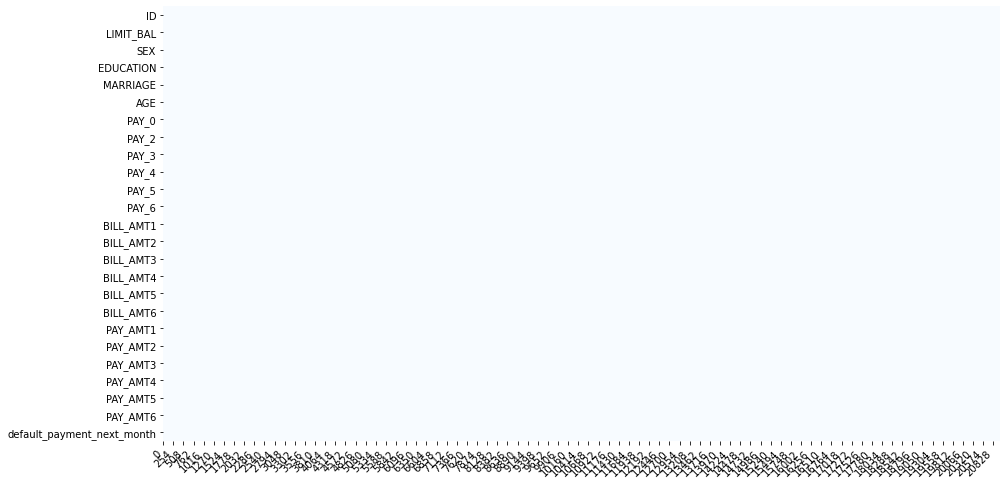

In [ ]:
plot_missing_value(df, return_df= True)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,21000.0,14949.183667,8632.775153,1.0,7508.75,14939.5,22386.75,29998.0
LIMIT_BAL,21000.0,167214.746667,128965.188482,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,21000.0,1.607571,0.488303,1.0,1.00,2.0,2.00,2.0
EDUCATION,21000.0,1.854190,0.791628,0.0,1.00,2.0,2.00,6.0
MARRIAGE,21000.0,1.551714,0.521176,0.0,1.00,2.0,2.00,3.0
AGE,21000.0,35.461619,9.206628,21.0,28.00,34.0,41.00,75.0
PAY_0,21000.0,-0.011190,1.123210,-2.0,-1.00,0.0,0.00,8.0
PAY_2,21000.0,-0.127238,1.198957,-2.0,-1.00,0.0,0.00,8.0
PAY_3,21000.0,-0.164857,1.198624,-2.0,-1.00,0.0,0.00,8.0
PAY_4,21000.0,-0.218190,1.172210,-2.0,-1.00,0.0,0.00,8.0


## Duplicated Data

In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0
0


In [ ]:
df=df.drop('ID', axis=1)

## Handle Outliers

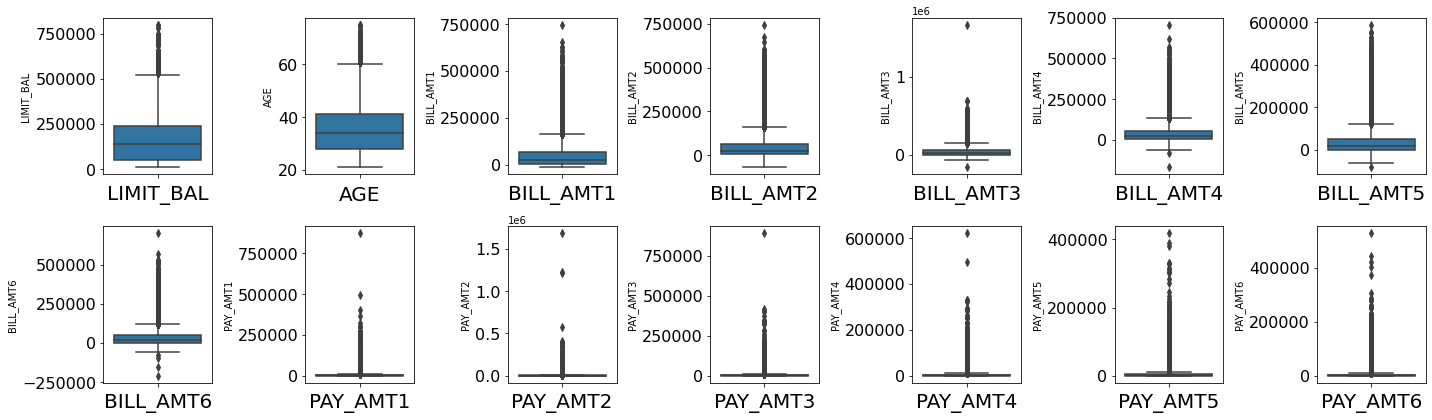

In [ ]:
#NUMERIK

nums = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


plt.figure(figsize=(20, 20))
for i in range(len(nums)):
    plt.subplot(len(nums)//2, 7, i+1)
    ax = sns.boxplot(
        y = df[nums[i]]
        )
    ax.set_xlabel(str(nums[i]), fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

In [ ]:
df['PAY_0'].value_counts()

 0    10324
-1     3937
 1     2608
-2     1923
 2     1883
 3      231
 4       47
 5       19
 8       11
 6        9
 7        8
Name: PAY_0, dtype: int64

In [ ]:
# df['SEX'] = df['SEX'].replace(1, "Male")
# df['SEX'] = df['SEX'].replace(2, "Female")
# df['EDUCATION'] = df['EDUCATION'].replace(1, "Graduate_School")
# df['EDUCATION'] = df['EDUCATION'].replace(2, "University")
# df['EDUCATION'] = df['EDUCATION'].replace(3, "High_School")
# df['EDUCATION'] = df['EDUCATION'].replace(4, "Others")
# df['EDUCATION'] = df['EDUCATION'].replace(5, "Unknown")
# df['EDUCATION'] = df['EDUCATION'].replace(6, "Unknown")
# df['EDUCATION'] = df['EDUCATION'].replace(0, "Unknown")
# df['PAY_0'] = df['PAY_0'].replace(0, "Unknown")

# LABEL ENCODING
df['MARRIAGE'] = df['MARRIAGE'].replace(1, "Married")
df['MARRIAGE'] = df['MARRIAGE'].replace(2, "Single")
df['MARRIAGE'] = df['MARRIAGE'].replace(3, "Divorced")
df['MARRIAGE'] = df['MARRIAGE'].replace(0, "Unknown")


In [ ]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LIMIT_BAL,21000.0,NaN,NaN,NaN,167214.746667,128965.188482,10000.0,50000.0,140000.0,240000.0,800000.0
SEX,21000.0,NaN,NaN,NaN,1.607571,0.488303,1.0,1.0,2.0,2.0,2.0
EDUCATION,21000.0,NaN,NaN,NaN,1.85419,0.791628,0.0,1.0,2.0,2.0,6.0
MARRIAGE,21000,4,Single,11184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,21000.0,NaN,NaN,NaN,35.461619,9.206628,21.0,28.0,34.0,41.0,75.0
PAY_0,21000.0,NaN,NaN,NaN,-0.01119,1.12321,-2.0,-1.0,0.0,0.0,8.0
PAY_2,21000.0,NaN,NaN,NaN,-0.127238,1.198957,-2.0,-1.0,0.0,0.0,8.0
PAY_3,21000.0,NaN,NaN,NaN,-0.164857,1.198624,-2.0,-1.0,0.0,0.0,8.0
PAY_4,21000.0,NaN,NaN,NaN,-0.21819,1.17221,-2.0,-1.0,0.0,0.0,8.0
PAY_5,21000.0,NaN,NaN,NaN,-0.260952,1.141454,-2.0,-1.0,0.0,0.0,8.0


__DATA OUTLIERS__

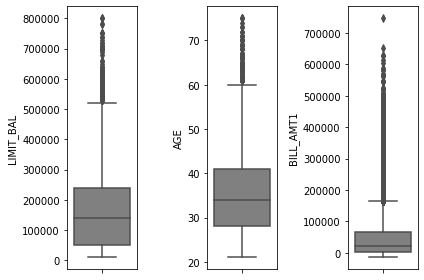

In [ ]:
nums = ['LIMIT_BAL','AGE','BILL_AMT1']
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

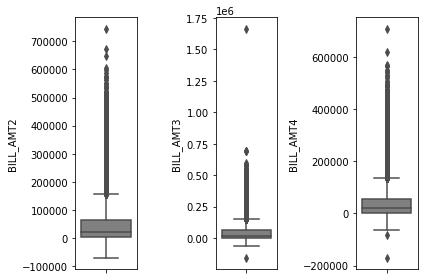

In [ ]:
nums = ['BILL_AMT2','BILL_AMT3', 'BILL_AMT4']
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

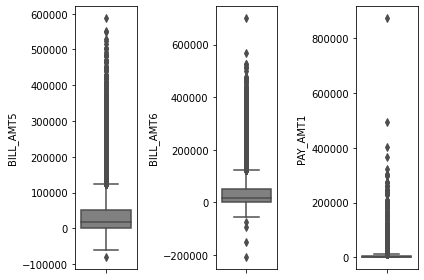

In [ ]:
nums = ['BILL_AMT5','BILL_AMT6', 'PAY_AMT1']
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

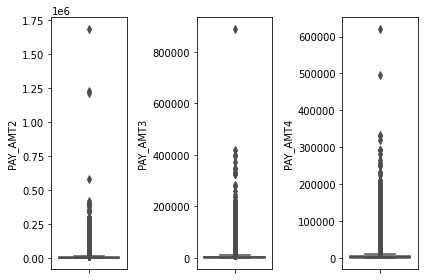

In [ ]:
nums = ['PAY_AMT2','PAY_AMT3', 'PAY_AMT4']
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

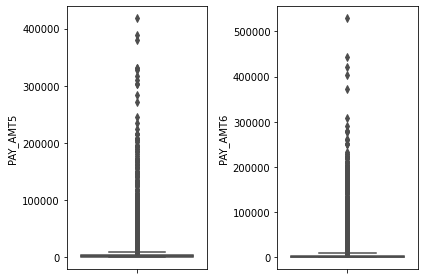

In [ ]:
nums = ['PAY_AMT5', 'PAY_AMT6']
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

<AxesSubplot:xlabel='PAY_AMT1', ylabel='Density'>

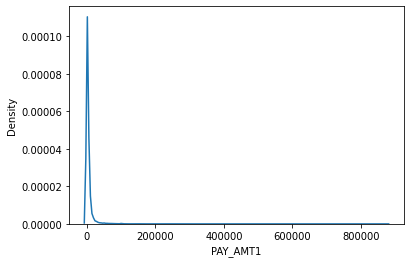

In [ ]:
sns.kdeplot(df['PAY_AMT1'])

<AxesSubplot:xlabel='PAY_AMT1', ylabel='Density'>

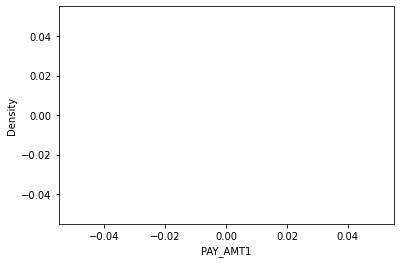

In [ ]:
sns.kdeplot(np.log(df['PAY_AMT1']))

In [ ]:
#Kemungkinan akan saya handle menggunakan yeo-jhonshon untuk transformnya karena boxcox mesti bernilai positif

In [ ]:
from scipy import stats

In [ ]:
df_boxcox = stats.yeojohnson(df['PAY_AMT1'])[0]
pd.Series(df_boxcox).skew()

-0.13960818206307582

#### IQR

In [ ]:
df_iqr=df.copy()

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_iqr)}')

for col in ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']:
  Q1 = df_iqr[col].quantile(0.25)
  Q3 = df_iqr[col].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  dtrain_iqr = df_iqr[(df_iqr[col] >= low_limit) & (df_iqr[col] <= high_limit)]

print(f'Jumlah baris setelah memfilter outlier: {len(dtrain_iqr)}')

Jumlah baris sebelum memfilter outlier: 21000
Jumlah baris setelah memfilter outlier: 18937


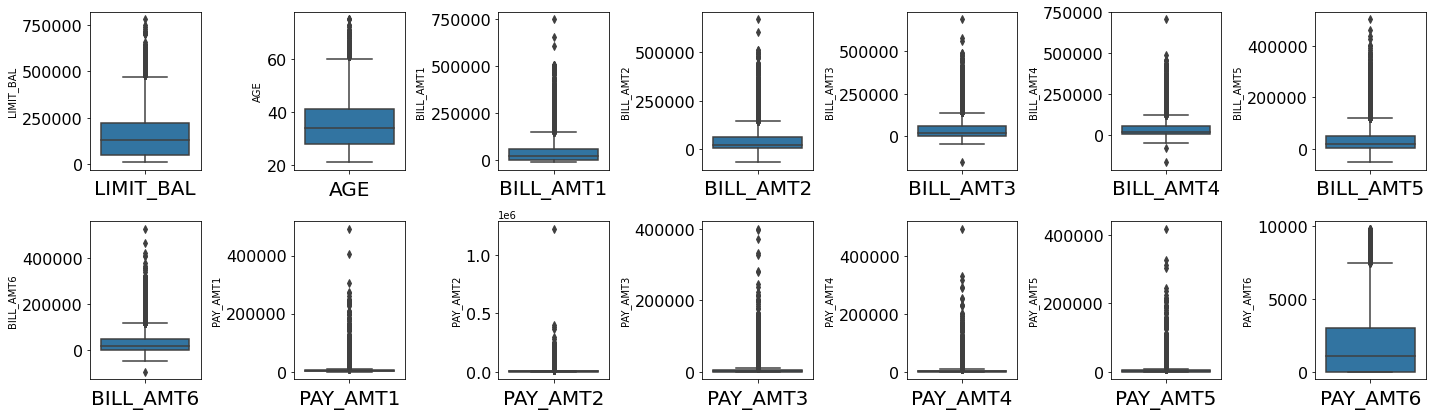

In [ ]:
nums = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


plt.figure(figsize=(20, 20))
for i in range(len(nums)):
    plt.subplot(len(nums)//2, 7, i+1)
    ax = sns.boxplot(
        y = dtrain_iqr[nums[i]]
        )
    ax.set_xlabel(str(nums[i]), fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

#### __ Z-SCORE__

skew skali pakai z-score

In [ ]:
df_zscore=df.copy()

In [ ]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df_zscore)}')

filtered_entries = np.array([True] * len(df_zscore))

for col in ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']:
    zscore = abs(stats.zscore(df_zscore[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
dtarin_zscore = df_zscore[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(dtarin_zscore)}')

Jumlah baris sebelum memfilter outlier: 21000
Jumlah baris setelah memfilter outlier: 18945


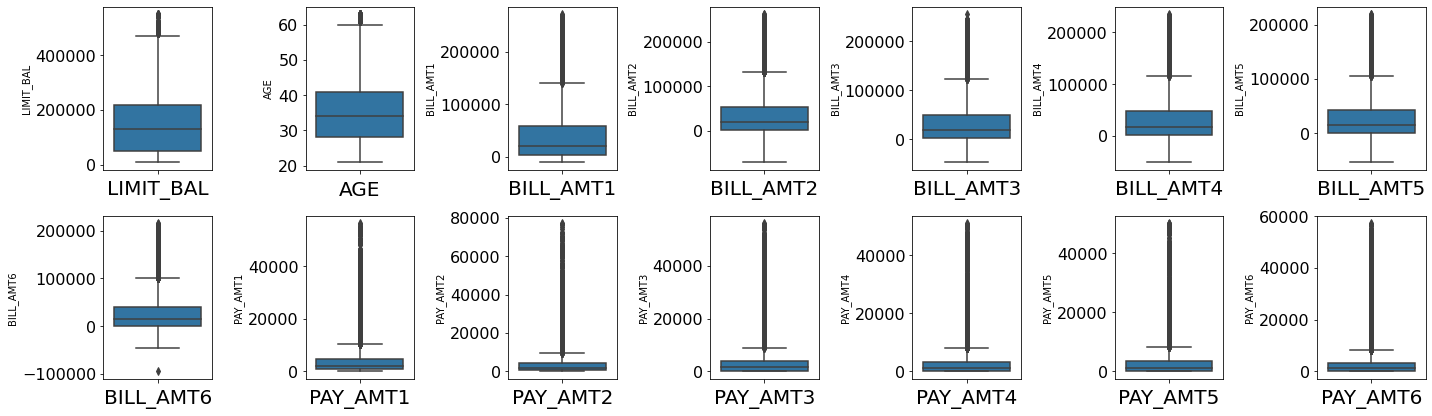

In [ ]:
nums = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


plt.figure(figsize=(20, 20))
for i in range(len(nums)):
    plt.subplot(len(nums)//2, 7, i+1)
    ax = sns.boxplot(
        y = dtarin_zscore[nums[i]]
        )
    ax.set_xlabel(str(nums[i]), fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

## Feature Transformation

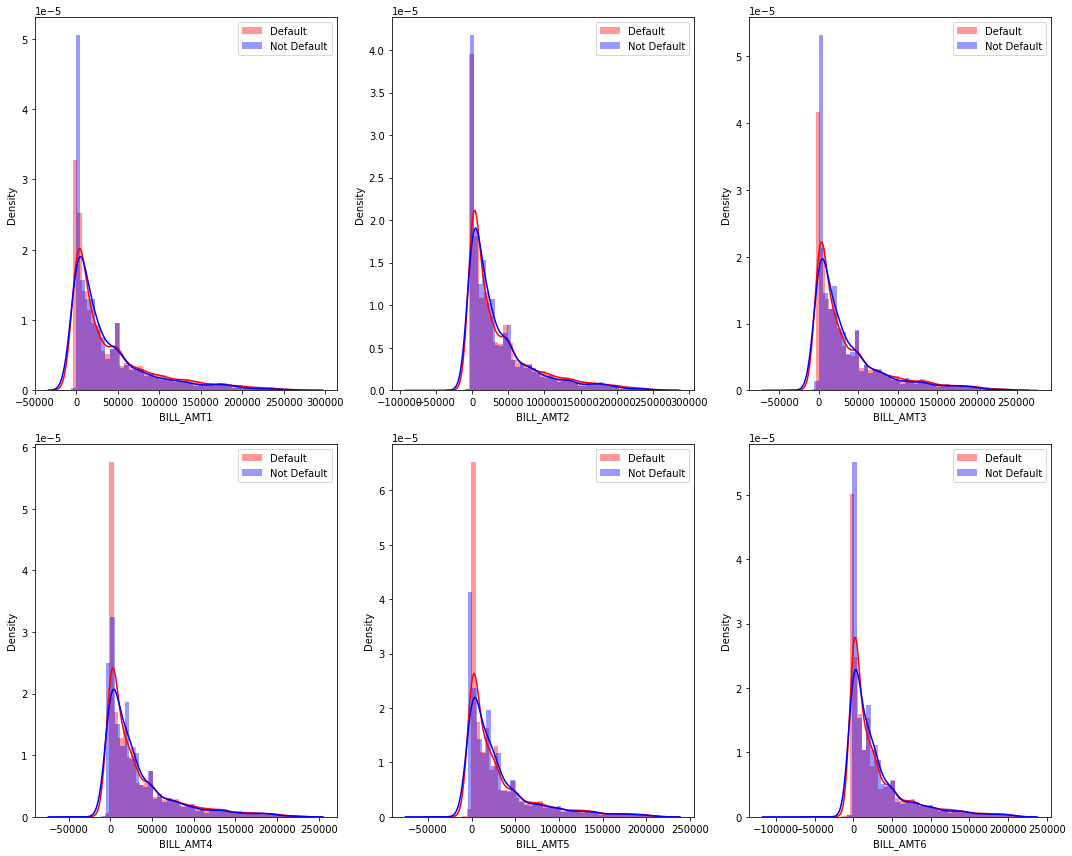

In [ ]:
features = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

c = plt.figure(figsize=(15, 12))

for i, j in enumerate(features):
    c.add_subplot(2, 3, i+1)
    sns.distplot(dtarin_zscore[j][dtarin_zscore.default_payment_next_month == 0], label='Default', color='r')
    sns.distplot(dtarin_zscore[j][dtarin_zscore.default_payment_next_month == 1],  label='Not Default', color='b')
    plt.legend()
    c.tight_layout()

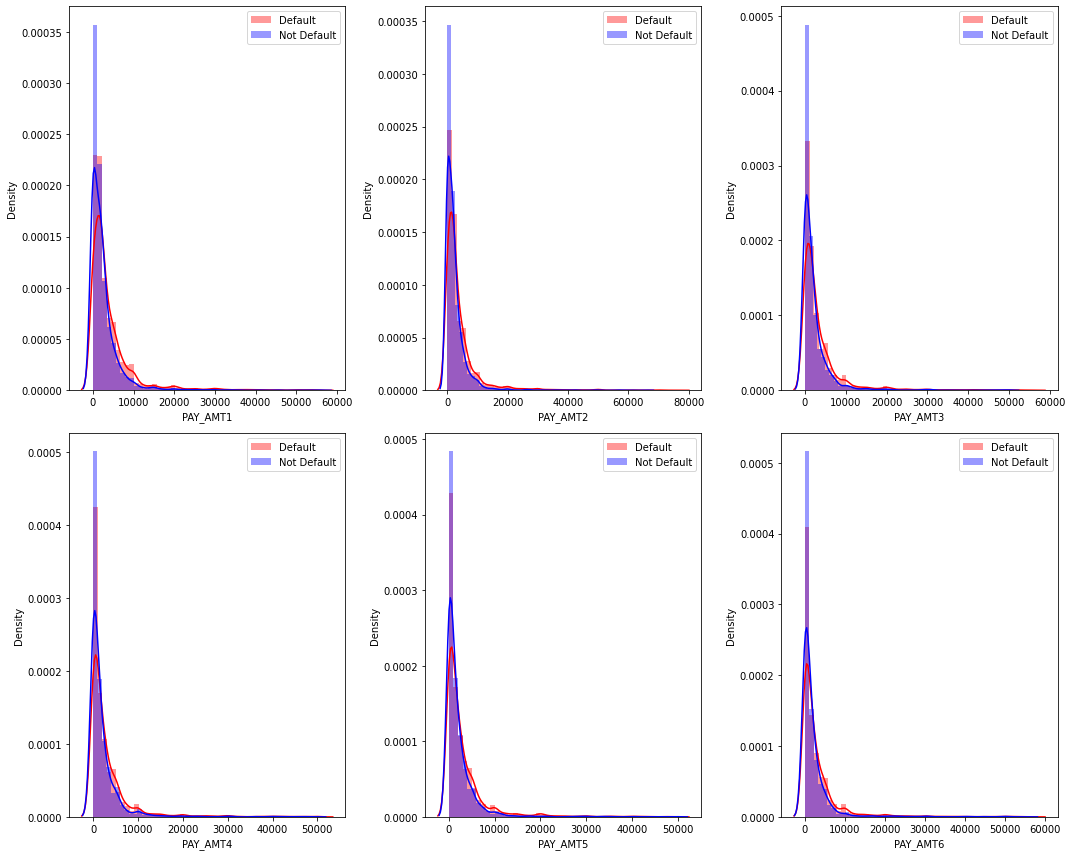

In [ ]:
features = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

x = plt.figure(figsize=(15, 12))

for i, j in enumerate(features):
    x.add_subplot(2, 3, i+1)
     
    sns.distplot(dtarin_zscore[j][dtarin_zscore.default_payment_next_month == 0], label='Default', color='r')
    sns.distplot(dtarin_zscore[j][dtarin_zscore.default_payment_next_month == 1],  label='Not Default', color='b')
    plt.legend()
    x.tight_layout()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
# dtarin_zscore['log_BILL_AMT1'] = RobustScaler().fit_transform(dtarin_zscore['BILL_AMT1'].values.reshape(len(dtarin_zscore), 1))
# dtarin_zscore['log_BILL_AMT2'] = RobustScaler().fit_transform(dtarin_zscore['BILL_AMT1'].values.reshape(len(dtarin_zscore), 1))
# dtarin_zscore['log_BILL_AMT3'] = RobustScaler().fit_transform(dtarin_zscore['BILL_AMT1'].values.reshape(len(dtarin_zscore), 1))
# dtarin_zscore['log_BILL_AMT4'] = RobustScaler().fit_transform(dtarin_zscore['BILL_AMT1'].values.reshape(len(dtarin_zscore), 1))
# dtarin_zscore['log_BILL_AMT5'] = RobustScaler().fit_transform(dtarin_zscore['BILL_AMT1'].values.reshape(len(dtarin_zscore), 1))
# dtarin_zscore['log_BILL_AMT6'] = RobustScaler().fit_transform(dtarin_zscore['BILL_AMT1'].values.reshape(len(dtarin_zscore), 1))
# dtarin_zscore['log_PAY_AMT1'] = RobustScaler().fit_transform(dtarin_zscore['PAY_AMT1'].values.reshape(len(dtarin_zscore), 1))
# dtarin_zscore['log_PAY_AMT2'] = RobustScaler().fit_transform(dtarin_zscore['PAY_AMT2'].values.reshape(len(dtarin_zscore), 1))
# dtarin_zscore['log_PAY_AMT3'] = RobustScaler().fit_transform(dtarin_zscore['PAY_AMT3'].values.reshape(len(dtarin_zscore), 1))
# dtarin_zscore['log_PAY_AMT4'] = RobustScaler().fit_transform(dtarin_zscore['PAY_AMT4'].values.reshape(len(dtarin_zscore), 1))
# dtarin_zscore['log_PAY_AMT5'] = RobustScaler().fit_transform(dtarin_zscore['PAY_AMT5'].values.reshape(len(dtarin_zscore), 1))
# dtarin_zscore['log_PAY_AMT6'] = RobustScaler().fit_transform(dtarin_zscore['PAY_AMT6'].values.reshape(len(dtarin_zscore), 1))

In [ ]:
dtarin_zscore.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [ ]:
dtarin_zscore['log_LIMIT_BAL'] = MinMaxScaler().fit_transform(dtarin_zscore['LIMIT_BAL'].values.reshape(len(dtarin_zscore), 1))
dtarin_zscore['log_AGE'] = MinMaxScaler().fit_transform(dtarin_zscore['AGE'].values.reshape(len(dtarin_zscore), 1))


#MENDEKATI DISTRIBUSI NORMAL MENGGUNAKAN STANDARD SCALER

dtarin_zscore['log_BILL_AMT1'] = StandardScaler().fit_transform(dtarin_zscore['BILL_AMT1'].values.reshape(len(dtarin_zscore), 1))
dtarin_zscore['log_BILL_AMT2'] = StandardScaler().fit_transform(dtarin_zscore['BILL_AMT1'].values.reshape(len(dtarin_zscore), 1))
dtarin_zscore['log_BILL_AMT3'] = StandardScaler().fit_transform(dtarin_zscore['BILL_AMT1'].values.reshape(len(dtarin_zscore), 1))
dtarin_zscore['log_BILL_AMT4'] = StandardScaler().fit_transform(dtarin_zscore['BILL_AMT1'].values.reshape(len(dtarin_zscore), 1))
dtarin_zscore['log_BILL_AMT5'] = StandardScaler().fit_transform(dtarin_zscore['BILL_AMT1'].values.reshape(len(dtarin_zscore), 1))
dtarin_zscore['log_BILL_AMT6'] = StandardScaler().fit_transform(dtarin_zscore['BILL_AMT1'].values.reshape(len(dtarin_zscore), 1))
dtarin_zscore['log_PAY_AMT1'] = StandardScaler().fit_transform(dtarin_zscore['PAY_AMT1'].values.reshape(len(dtarin_zscore), 1))
dtarin_zscore['log_PAY_AMT2'] = StandardScaler().fit_transform(dtarin_zscore['PAY_AMT2'].values.reshape(len(dtarin_zscore), 1))
dtarin_zscore['log_PAY_AMT3'] = StandardScaler().fit_transform(dtarin_zscore['PAY_AMT3'].values.reshape(len(dtarin_zscore), 1))
dtarin_zscore['log_PAY_AMT4'] = StandardScaler().fit_transform(dtarin_zscore['PAY_AMT4'].values.reshape(len(dtarin_zscore), 1))
dtarin_zscore['log_PAY_AMT5'] = StandardScaler().fit_transform(dtarin_zscore['PAY_AMT5'].values.reshape(len(dtarin_zscore), 1))
dtarin_zscore['log_PAY_AMT6'] = StandardScaler().fit_transform(dtarin_zscore['PAY_AMT6'].values.reshape(len(dtarin_zscore), 1))

In [ ]:
dtarin_zscore.describe()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,log_LIMIT_BAL,log_AGE,log_BILL_AMT1,log_BILL_AMT2,log_BILL_AMT3,log_BILL_AMT4,log_BILL_AMT5,log_BILL_AMT6,log_PAY_AMT1,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6
count,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04
mean,152052.362101,1.610926,1.863183,35.193455,0.007231,-0.110583,-0.150277,-0.207284,-0.255899,-0.290156,41382.812721,39366.196780,37124.082344,33859.918237,31298.988335,29994.349116,3765.237635,3795.178886,3292.848245,2969.585273,2926.982740,3007.029348,0.230087,0.263060,0.337939,2.128147e-16,2.128147e-16,2.128147e-16,2.128147e-16,2.128147e-16,2.128147e-16,3.856626e-17,2.748337e-16,6.257392e-16,-7.879683e-17,1.371355e-16,-1.665481e-16
std,117898.040057,0.487553,0.784583,9.030033,1.131644,1.217034,1.223045,1.199860,1.170383,1.181305,51566.262828,49567.703102,47252.635531,44065.603776,41982.145927,41258.736028,5831.561038,6568.409159,5744.487917,5414.117558,5147.002608,5802.942543,0.420899,0.218330,0.215001,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,10000.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-9802.000000,-69777.000000,-46127.000000,-50616.000000,-53007.000000,-94625.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.926289e-01,-9.926289e-01,-9.926289e-01,-9.926289e-01,-9.926289e-01,-9.926289e-01,-6.456825e-01,-5.778080e-01,-5.732339e-01,-5.485037e-01,-5.686922e-01,-5.182041e-01
25%,50000.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3144.000000,2549.000000,2300.000000,1900.000000,1368.000000,938.000000,750.000000,643.000000,326.000000,155.000000,104.000000,0.000000,0.000000,0.074074,0.166667,-7.415667e-01,-7.415667e-01,-7.415667e-01,-7.415667e-01,-7.415667e-01,-7.415667e-01,-5.170686e-01,-4.799126e-01,-5.164823e-01,-5.198741e-01,-5.484857e-01,-5.182041e-01
50%,130000.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20110.000000,19432.000000,18742.000000,17812.000000,16256.000000,14629.000000,2000.000000,2000.000000,1600.000000,1260.000000,1300.000000,1200.000000,0.000000,0.222222,0.309524,-4.125444e-01,-4.125444e-01,-4.125444e-01,-4.125444e-01,-4.125444e-01,-4.125444e-01,-3.027121e-01,-2.733122e-01,-2.946987e-01,-3.157727e-01,-3.161113e-01,-3.114070e-01
75%,220000.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58363.000000,53997.000000,50639.000000,47643.000000,43115.000000,40574.000000,4567.000000,4250.000000,3799.000000,3300.000000,3365.000000,3240.000000,0.000000,0.388889,0.476190,3.292974e-01,3.292974e-01,3.292974e-01,3.292974e-01,3.292974e-01,3.292974e-01,1.374904e-01,6.924555e-02,8.811318e-02,6.102997e-02,8.510367e-02,4.014805e-02
max,550000.000000,2.000000,6.000000,63.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,271115.000000,261430.000000,254970.000000,234928.000000,219354.000000,214879.000000,56270.000000,77000.000000,56116.000000,50918.000000,50086.000000,57258.000000,1.000000,1.000000,1.000000,4.455205e+00,4.455205e+00,4.455205e+00,4.455205e+00,4.455205e+00,4.455205e+00,9.003790e+00,1.114528e+01,9.195693e+00,8.856417e+00,9.162665e+00,9.349119e+00


## Feature Encoding

Disni kami OneHotEncod untuk MARRIAGE saja tetapi next step kami juga akan melakukan hal yang sama untuk PAY_0 hingga PAY_6, hal ini dilakukan agar kami bisa membandingkan hasil algo kedepannya mana yang terbaik. sedangkan untuk SEX dan EDUCATION sudah ter-LabelEncod dari sumber datanya (Kaggle)

In [ ]:
cats_updated = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column SEX
2    12759
1     8241
Name: SEX, dtype: int64
------------------------------ 

value counts of column EDUCATION
2    9789
1    7415
3    3467
5     200
4      85
6      34
0      10
Name: EDUCATION, dtype: int64
------------------------------ 

value counts of column MARRIAGE
Single      11184
Married      9561
Divorced      219
Unknown        36
Name: MARRIAGE, dtype: int64
------------------------------ 

value counts of column PAY_0
 0    10324
-1     3937
 1     2608
-2     1923
 2     1883
 3      231
 4       47
 5       19
 8       11
 6        9
 7        8
Name: PAY_0, dtype: int64
------------------------------ 

value counts of column PAY_2
 0    11043
-1     4174
 2     2776
-2     2643
 3      229
 4       69
 1       23
 5       21
 7       11
 6       10
 8        1
Name: PAY_2, dtype: int64
------------------------------ 

value counts of column PAY_3
 0    11056
-1     4125
-2     2868
 2     2670
 3      173
 4       55
 7       22
 5       

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

##### 1. IQR

In [ ]:
for cat in ['MARRIAGE']:
    onehots = pd.get_dummies(dtrain_iqr[cat], prefix=cat)
    dtrain_iqr1 = dtrain_iqr.join(onehots)

In [ ]:
dtrain_iqr1 = dtrain_iqr1.drop(columns=['MARRIAGE',"MARRIAGE_Unknown"])
dtrain_iqr1.head(2)

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,MARRIAGE_Divorced,MARRIAGE_Married,MARRIAGE_Single
1,240000,2,1,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,0,0,1
2,320000,2,2,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0,0,1,0


Kami drop MARRIEAGE karena fitur ini sudah kami OneHotEncod sehingga kedepannya menggunakan fitur haril OHE dan kami drop MARRIAGE_Unknown karena kami berasumsi bahwa hal ini bisa dilakukan dikarenakan ini akan bernilai 1 jika ketiga fitur lainnya bernilai 0

In [ ]:
  dtrain_iqr.describe(include='all')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,18937.000000,18937.000000,18937.000000,18937,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,1.893700e+04,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,10097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,155095.827217,1.605270,1.870148,NaN,35.387865,0.025083,-0.097534,-0.136716,-0.193642,-0.239478,-0.270476,46419.038496,44580.894175,42265.980197,38661.560279,36002.572160,34884.527380,4716.889423,4.704750e+03,4118.157839,3856.781908,3753.044780,1938.636215,0.232772
std,120608.896605,0.488806,0.789858,NaN,9.275817,1.128263,1.215588,1.219106,1.197380,1.166009,1.175070,63035.374598,60622.775534,58336.384531,53921.491262,50554.433596,49486.982205,13711.260641,1.624205e+04,13196.385156,12860.960924,12375.143931,2177.959823,0.422609
min,10000.000000,1.000000,0.000000,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-10682.000000,-69777.000000,-157264.000000,-170000.000000,-53007.000000,-94625.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3167.000000,2640.000000,2310.000000,1927.000000,1426.000000,1000.000000,742.000000,6.500000e+02,329.000000,182.000000,129.000000,0.000000,0.000000
50%,130000.000000,2.000000,2.000000,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21101.000000,20396.000000,19478.000000,18550.000000,17667.000000,16636.000000,2000.000000,2.000000e+03,1600.000000,1300.000000,1341.000000,1100.000000,0.000000
75%,220000.000000,2.000000,2.000000,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62775.000000,60100.000000,56718.000000,50405.000000,48268.000000,47606.000000,4701.000000,4.322000e+03,3900.000000,3473.000000,3435.000000,3000.000000,0.000000


##### 2. Z_SCORE

In [ ]:
for cat in ['MARRIAGE']:
    onehots = pd.get_dummies(dtarin_zscore[cat], prefix=cat)
    dtarin_zscore1 =  dtarin_zscore.join(onehots)

In [ ]:
  dtarin_zscore1.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,log_LIMIT_BAL,log_AGE,log_BILL_AMT1,log_BILL_AMT2,log_BILL_AMT3,log_BILL_AMT4,log_BILL_AMT5,log_BILL_AMT6,log_PAY_AMT1,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,MARRIAGE_Divorced,MARRIAGE_Married,MARRIAGE_Single,MARRIAGE_Unknown
0,360000,2,2,Single,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,0.648148,0.095238,-0.396215,-0.396215,-0.396215,-0.396215,-0.396215,-0.396215,1.513316,-0.048138,0.026661,1.089849,-0.17622,4.142141,0,0,1,0
1,240000,2,1,Single,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,0.425926,0.595238,-0.793695,-0.793695,-0.793695,-0.793695,-0.793695,-0.793695,-0.645683,-0.577808,-0.183285,-0.548504,-0.12823,0.011541,0,0,1,0


In [ ]:
dtarin_zscore1 = dtarin_zscore1.drop(columns=['MARRIAGE',"MARRIAGE_Unknown"])
dtarin_zscore1.head(2)

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,log_LIMIT_BAL,log_AGE,log_BILL_AMT1,log_BILL_AMT2,log_BILL_AMT3,log_BILL_AMT4,log_BILL_AMT5,log_BILL_AMT6,log_PAY_AMT1,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,MARRIAGE_Divorced,MARRIAGE_Married,MARRIAGE_Single
0,360000,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,0.648148,0.095238,-0.396215,-0.396215,-0.396215,-0.396215,-0.396215,-0.396215,1.513316,-0.048138,0.026661,1.089849,-0.17622,4.142141,0,0,1
1,240000,2,1,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,0.425926,0.595238,-0.793695,-0.793695,-0.793695,-0.793695,-0.793695,-0.793695,-0.645683,-0.577808,-0.183285,-0.548504,-0.12823,0.011541,0,0,1


In [ ]:
  dtarin_zscore1.describe()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,log_LIMIT_BAL,log_AGE,log_BILL_AMT1,log_BILL_AMT2,log_BILL_AMT3,log_BILL_AMT4,log_BILL_AMT5,log_BILL_AMT6,log_PAY_AMT1,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,MARRIAGE_Divorced,MARRIAGE_Married,MARRIAGE_Single
count,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,1.894500e+04,18945.000000,18945.000000,18945.000000
mean,152052.362101,1.610926,1.863183,35.193455,0.007231,-0.110583,-0.150277,-0.207284,-0.255899,-0.290156,41382.812721,39366.196780,37124.082344,33859.918237,31298.988335,29994.349116,3765.237635,3795.178886,3292.848245,2969.585273,2926.982740,3007.029348,0.230087,0.263060,0.337939,2.128147e-16,2.128147e-16,2.128147e-16,2.128147e-16,2.128147e-16,2.128147e-16,3.856626e-17,2.748337e-16,6.257392e-16,-7.879683e-17,1.371355e-16,-1.665481e-16,0.010874,0.450990,0.536342
std,117898.040057,0.487553,0.784583,9.030033,1.131644,1.217034,1.223045,1.199860,1.170383,1.181305,51566.262828,49567.703102,47252.635531,44065.603776,41982.145927,41258.736028,5831.561038,6568.409159,5744.487917,5414.117558,5147.002608,5802.942543,0.420899,0.218330,0.215001,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,0.103711,0.497605,0.498691
min,10000.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-9802.000000,-69777.000000,-46127.000000,-50616.000000,-53007.000000,-94625.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.926289e-01,-9.926289e-01,-9.926289e-01,-9.926289e-01,-9.926289e-01,-9.926289e-01,-6.456825e-01,-5.778080e-01,-5.732339e-01,-5.485037e-01,-5.686922e-01,-5.182041e-01,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3144.000000,2549.000000,2300.000000,1900.000000,1368.000000,938.000000,750.000000,643.000000,326.000000,155.000000,104.000000,0.000000,0.000000,0.074074,0.166667,-7.415667e-01,-7.415667e-01,-7.415667e-01,-7.415667e-01,-7.415667e-01,-7.415667e-01,-5.170686e-01,-4.799126e-01,-5.164823e-01,-5.198741e-01,-5.484857e-01,-5.182041e-01,0.000000,0.000000,0.000000
50%,130000.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20110.000000,19432.000000,18742.000000,17812.000000,16256.000000,14629.000000,2000.000000,2000.000000,1600.000000,1260.000000,1300.000000,1200.000000,0.000000,0.222222,0.309524,-4.125444e-01,-4.125444e-01,-4.125444e-01,-4.125444e-01,-4.125444e-01,-4.125444e-01,-3.027121e-01,-2.733122e-01,-2.946987e-01,-3.157727e-01,-3.161113e-01,-3.114070e-01,0.000000,0.000000,1.000000
75%,220000.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58363.000000,53997.000000,50639.000000,47643.000000,43115.000000,40574.000000,4567.000000,4250.000000,3799.000000,3300.000000,3365.000000,3240.000000,0.000000,0.388889,0.476190,3.292974e-01,3.292974e-01,3.292974e-01,3.292974e-01,3.292974e-01,3.292974e-01,1.374904e-01,6.924555e-02,8.811318e-02,6.102997e-02,8.510367e-02,4.014805e-02,0.000000,1.000000,1.000000
max,550000.000000,2.000000,6.000000,63.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,271115.000000,261430.000000,254970.000000,234928.000000,219354.000000,214879.000000,56270.000000,77000.000000,56116.000000,50918.000000,50086.000000

In [ ]:
 dtarin_zscore1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month', 'log_LIMIT_BAL', 'log_AGE',
       'log_BILL_AMT1', 'log_BILL_AMT2', 'log_BILL_AMT3', 'log_BILL_AMT4',
       'log_BILL_AMT5', 'log_BILL_AMT6', 'log_PAY_AMT1', 'log_PAY_AMT2',
       'log_PAY_AMT3', 'log_PAY_AMT4', 'log_PAY_AMT5', 'log_PAY_AMT6',
       'MARRIAGE_Divorced', 'MARRIAGE_Married', 'MARRIAGE_Single'],
      dtype='object')

In [ ]:
 dtarin_zscore1 =  dtarin_zscore1.drop(columns=["LIMIT_BAL","AGE", 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

In [ ]:
dtarin_zscore1.head()

,SEX,EDUCATION,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default_payment_next_month,log_LIMIT_BAL,log_AGE,log_BILL_AMT1,log_BILL_AMT2,log_BILL_AMT3,log_BILL_AMT4,log_BILL_AMT5,log_BILL_AMT6,log_PAY_AMT1,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,MARRIAGE_Divorced,MARRIAGE_Married,MARRIAGE_Single
0,2,2,-1,-1,-1,-1,-1,-1,0,0.648148,0.095238,-0.396215,-0.396215,-0.396215,-0.396215,-0.396215,-0.396215,1.513316,-0.048138,0.026661,1.089849,-0.176220,4.142141,0,0,1
1,2,1,2,2,-2,-1,0,-1,0,0.425926,0.595238,-0.793695,-0.793695,-0.793695,-0.793695,-0.793695,-0.793695,-0.645683,-0.577808,-0.183285,-0.548504,-0.128230,0.011541,0,0,1
2,2,2,0,0,0,0,0,0,0,0.574074,0.476190,0.164127,0.164127,0.164127,0.164127,0.164127,0.164127,0.211743,-0.273312,-0.225065,0.005618,0.014187,-0.259708,0,1,0
3,2,2,-1,-1,-2,-2,-2,-2,1,0.074074,0.071429,-0.750662,-0.750662,-0.750662,-0.750662,-0.750662,-0.750662,-0.645683,-0.577808,-0.573234,-0.548504,-0.568692,-0.518204,0,0,1
4,1,3,-1,0,0,0,0,0,0,0.129630,0.738095,-0.107085,-0.107085,-0.107085,-0.107085,-0.107085,-0.107085,-0.388455,-0.349436,-0.312107,-0.358625,-0.398492,-0.268497,0,1,0


In [ ]:
dtarin_zscore1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18945 entries, 0 to 20999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SEX                         18945 non-null  int64  
 1   EDUCATION                   18945 non-null  int64  
 2   PAY_0                       18945 non-null  int64  
 3   PAY_2                       18945 non-null  int64  
 4   PAY_3                       18945 non-null  int64  
 5   PAY_4                       18945 non-null  int64  
 6   PAY_5                       18945 non-null  int64  
 7   PAY_6                       18945 non-null  int64  
 8   default_payment_next_month  18945 non-null  int64  
 9   log_LIMIT_BAL               18945 non-null  float64
 10  log_AGE                     18945 non-null  float64
 11  log_BILL_AMT1               18945 non-null  float64
 12  log_BILL_AMT2               18945 non-null  float64
 13  log_BILL_AMT3               189

## Handle Imbalanced 

In [ ]:
# dtarin_zscore1['default_payment_nextmonth'] = dtarin_zscore1['default_payment_next_month'] > 0.8
# dtarin_zscore1['default_payment_nextmonth'].value_counts()

In [ ]:
# X = dtarin_zscore1[[col for col in dtarin_zscore1.columns if (str(dtarin_zscore1[col].dtype) != 'object') and col not in ['default_payment_next_month']]]
# y = dtarin_zscore1['default_payment_next_month'].values
# print(X.shape)
# print(y.shape)
(18945, 25)
(18945,)

(18945,)

In [ ]:
X =  dtarin_zscore1.drop(columns="default_payment_next_month")
y = dtarin_zscore1.default_payment_next_month
print(X.shape)
print(y.shape)

(18945, 25)
(18945,)


In [ ]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    14586
1     4359
Name: default_payment_next_month, dtype: int64


UNDERSAMPLING
0    8718
1    4359
Name: default_payment_next_month, dtype: int64


OVERSAMPLING
0    14586
1     7293
Name: default_payment_next_month, dtype: int64


SMOTE
0    14586
1     7293
Name: default_payment_next_month, dtype: int64


# AUTO ML

In [ ]:
df1 = pd.read_csv("train_20D8GL3.csv")
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


### FEATURE ENCODING PAY0_6

In [ ]:
df1['MARRIAGE'] = df1['MARRIAGE'].replace(1, "Married")
df1['MARRIAGE'] = df1['MARRIAGE'].replace(2, "Single")
df1['MARRIAGE'] = df1['MARRIAGE'].replace(3, "Divorced")
df1['MARRIAGE'] = df1['MARRIAGE'].replace(0, "Unknown")

In [ ]:
for cat in ['MARRIAGE']:
    onehots = pd.get_dummies(df1[cat], prefix=cat)
    df11 = df1.join(onehots)
    

In [ ]:
for cat in ['PAY_0']:
    onehots = pd.get_dummies(df11[cat], prefix=cat)
    df12 = df11.join(onehots)

In [ ]:
for cat in [ 'PAY_2']:
    onehots = pd.get_dummies(df12[cat], prefix=cat)
    df13 = df12.join(onehots)

In [ ]:
for cat in ['PAY_3']:
    onehots = pd.get_dummies(df13[cat], prefix=cat)
    df14 = df13.join(onehots)

In [ ]:
for cat in [ 'PAY_4']:
    onehots = pd.get_dummies(df14[cat], prefix=cat)
    df15 = df14.join(onehots)

In [ ]:
for cat in ['PAY_5']:
    onehots = pd.get_dummies(df15[cat], prefix=cat)
    df16 = df15.join(onehots)

In [ ]:
for cat in ['PAY_6']:
    onehots = pd.get_dummies(df16[cat], prefix=cat)
    df17 = df16.join(onehots)

In [ ]:
df17.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,MARRIAGE_Divorced,MARRIAGE_Married,MARRIAGE_Single,MARRIAGE_Unknown,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,25150,360000,2,2,Single,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,13470,240000,2,1,Single,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df11 = df17.drop(columns=['MARRIAGE',"MARRIAGE_Unknown",'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
df11.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,MARRIAGE_Divorced,MARRIAGE_Married,MARRIAGE_Single,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,25150,360000,2,2,25,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,13470,240000,2,1,46,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
from jcopml.automl import AutoClassifier

X = df11.drop(columns="default_payment_next_month")
y = df11.default_payment_next_month

In [ ]:
model = AutoClassifier (['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                         'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                         'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
        ['SEX', 'EDUCATION','MARRIAGE_Divorced', 'MARRIAGE_Married',
       'MARRIAGE_Single', 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1',
       'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7',
       'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2',
       'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8',
       'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3',
       'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2',
       'PAY_4_-1', 'PAY_4_0', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0',
       'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7',
       'PAY_5_8', 'PAY_6_-2', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3',
       'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8'])

In [ ]:
# model.fit(X, y, cv=3, scoring='f1_macro')

# ================== Best Model Info ==================
# algo                      | XGBClassifier
# algo__colsample_bytree    | 0.1349512609864809
# algo__gamma               | 6
# algo__learning_rate       | 0.11862189410697288
# algo__max_depth           | 5
# algo__n_estimators        | 196
# algo__reg_alpha           | 2.0486889035689253
# algo__reg_lambda          | 0.012194715233377654
# algo__subsample           | 0.7826259151953849
# =====================================================

# ================================ Best Preprocessor Info =================================
# categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
# categorical_encoder       | OneHotEncoder
# numerical_imputer         | SimpleImputer(add_indicator=False, strategy='mean')
# =========================================================================================

# =========== Score ===========
# Train: 0.6965882462161591
# Valid: 0.6827436644184589
# Test : 0.679032237953754
# =============================

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[10:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
================== Best Model Info ==================
algo                      | XGBClassifier
algo__colsample_bytree    | 0.1349512609864809
algo__gamma               | 6
algo__learning_rate       | 0.11862189410697288
algo__max_depth           | 5
algo__n_estimators        | 196
algo__reg_alpha           | 2.0486889035689253
algo__reg_lambda          | 0.012194715233377654
algo__subsample           | 0.7826259151953849

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder    

In [ ]:
model = AutoClassifier (['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                         'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                         'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','SEX', 
                         'EDUCATION','MARRIAGE_Divorced', 'MARRIAGE_Married',
                         'MARRIAGE_Single', 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1',
                           'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7',
                           'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2',
                           'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8',
                           'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3',
                           'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2',
                           'PAY_4_-1', 'PAY_4_0', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
                           'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0',
                           'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7',
                           'PAY_5_8', 'PAY_6_-2', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3',
                           'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8'],
        [])

In [ ]:
# model.fit(X, y, cv=3, scoring='f1_macro')

# Fitting 3 folds for each of 50 candidates, totalling 150 fits
# ================== Best Model Info ==================
# algo                      | LogisticRegression
# algo__C                   | 1.037104595424722
# algo__fit_intercept       | False
# =====================================================

# ================================ Best Preprocessor Info =================================
# categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
# categorical_encoder       | OneHotEncoder
# numerical_imputer         | SimpleImputer(add_indicator=True, strategy='mean')
# numerical_transformer     | PowerTransformer(method='yeo-johnson')
# =========================================================================================

# =========== Score ===========
# Train: 0.7055511017211152
# Valid: 0.6998423840837874
# Test : 0.6971623101439375
# =============================

Fitting 3 folds for each of 50 candidates, totalling 150 fits
================== Best Model Info ==================
algo                      | LogisticRegression
algo__C                   | 1.037104595424722
algo__fit_intercept       | False

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | SimpleImputer(add_indicator=True, strategy='mean')
numerical_transformer     | PowerTransformer(method='yeo-johnson')

=========== Score ===========
Train: 0.7055511017211152
Valid: 0.6998423840837874
Test : 0.6971623101439375


Disini telah kami melakukan percobaan algoritma yaitu KNN (KNeighborsClassifier), SVM (Super Vector Machine), RF (Random Forest), XGBOOST, LG (Logistic Regression) dan kami mendapatkan hasil terbaik yaitu XGBOOST tanpa menggunakan Machine Learning dan sekarang kami masih dalam proses improve algo tersebut dan akan mencoba beberpa percobaan 5,4,3,2,1 bulan terakhir untuk merekomendasikan ke Bank tersebut terkait data yang cocok untuk memprediksi yang lebih baik serta akan mencoba menggunakan fitur tanpa history dengan asumsi dapat digunakan untuk nasabah yang baru, begitu juga dengan auto ML akan tetap kami lakukan agar pengerjaan lebih efektif dan efisien, dimana akan kami jadikan bahan perbandingan terkait algo yang kami improve

kami tidak drop fitur dan memutuskan menggunakan semuanya untuk melihat hasilnya dan melakukan feature importans untuk sebagai bahan perbandingan kedepannya. Kami juga memutuskan tidak SMOTE sebab menghindari dampat dari oversampling sehingga kedepannya kami akan menggunakan F1_Score serta melihat hasil ROC_AUC nya. Sedangkan untuk Transformnya kami memutuskan menggunakan YEO-JHONSON dan Robust dikarenakan data kami yang sangat skew.
